In [22]:
import numpy as np
from sklearn.cluster import SpectralClustering
import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'bayanpy', 'infomap', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap'}


## Spectral Clustering vs K-means

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


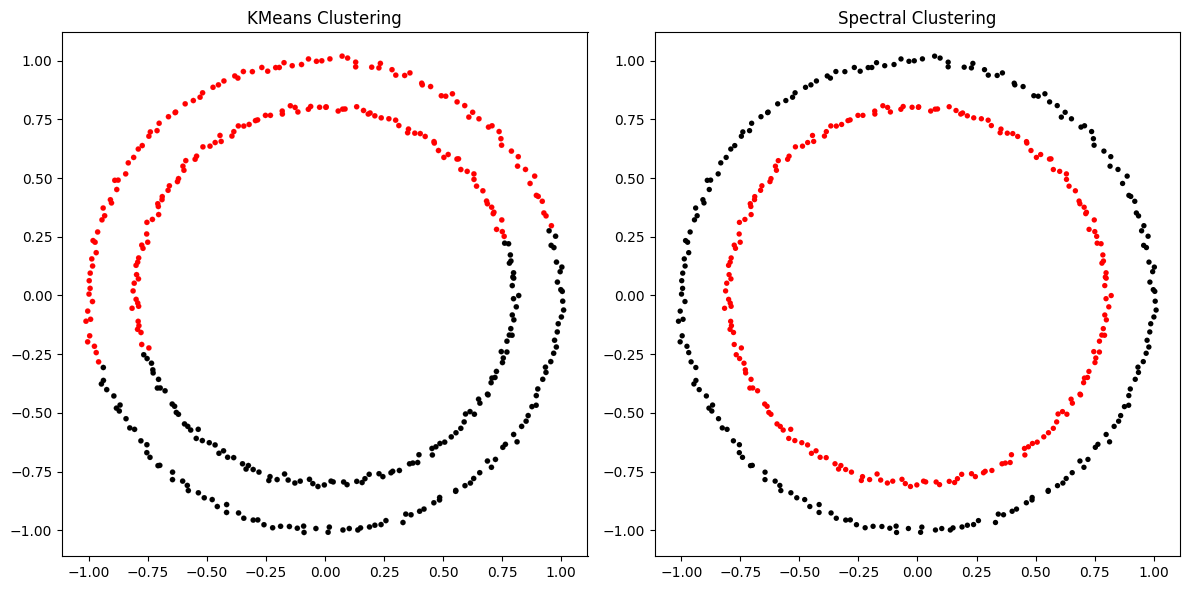

Davies-Bouldin Score for K means alg.: 1.146393729257092
Davies-Bouldin Score for Spectral clustering: 2863.2623509816317


In [2]:
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

# cluster with kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
Kmean.fit(circles)
clusters = Kmean.predict(circles)



# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(circles)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0.1, c=clusters, cmap='flag')
axes[0].set_title('KMeans Clustering')

axes[1].scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels, cmap='flag')
axes[1].set_title('Spectral Clustering')

# Afficher la figure
plt.tight_layout()
plt.show()



print("Davies-Bouldin Score for K means alg.:", davies_bouldin_score(circles, clusters))
print("Davies-Bouldin Score for Spectral clustering:", davies_bouldin_score(circles, labels))



In [46]:
circles

array([[-5.35996999e-01, -8.40536408e-01],
       [-7.45641859e-01, -2.23615456e-01],
       [-2.32752335e-01, -7.71694766e-01],
       [ 9.87478742e-01, -1.20518419e-01],
       [ 8.48586167e-02,  7.94324381e-01],
       [-3.07451929e-01,  9.53378327e-01],
       [ 1.50461304e-01, -9.90067558e-01],
       [-2.85230945e-01,  7.47771416e-01],
       [-2.84419721e-01, -9.56133185e-01],
       [ 7.12299818e-01,  3.48435414e-01],
       [ 4.12092736e-01,  8.97054775e-01],
       [-4.77491087e-01, -8.69537600e-01],
       [-9.24128996e-01, -4.01120609e-01],
       [-5.15612214e-02, -8.01399292e-01],
       [ 9.26686356e-01,  3.51364515e-01],
       [-2.67467790e-01,  9.71089872e-01],
       [-7.88867052e-01,  1.59850350e-01],
       [-3.03806346e-01, -9.56814396e-01],
       [ 7.87249332e-01,  1.46711767e-01],
       [ 1.00642195e+00, -2.44632676e-02],
       [ 7.21712654e-01, -6.98380745e-01],
       [-4.44490820e-01,  6.81566134e-01],
       [-7.40857220e-01, -6.89615269e-01],
       [-1.

<Figure size 1000x800 with 0 Axes>

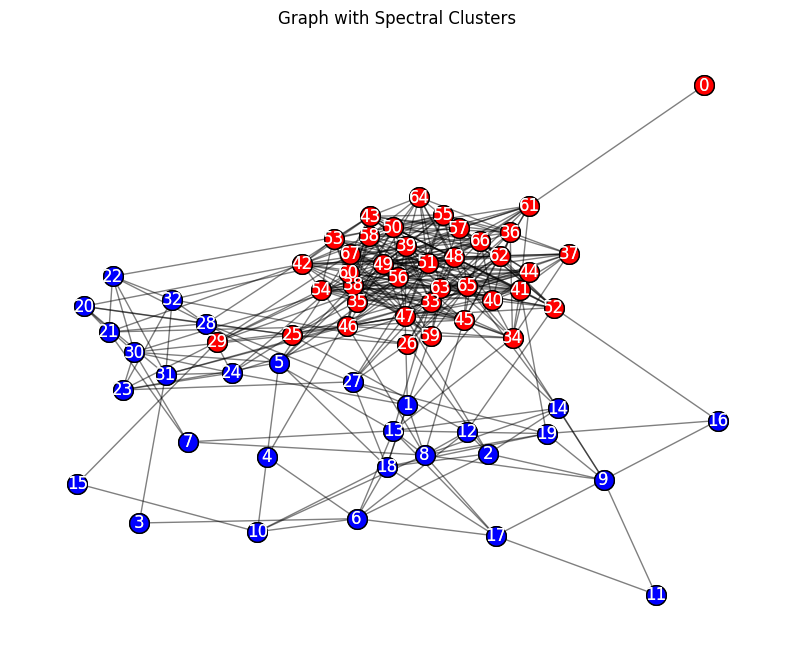

In [88]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from cdlib import algorithms

sizes = [20, 13, 35]
probs = [[0.25, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]]
G = nx.stochastic_block_model(sizes, probs, seed=0)

coms = algorithms.spectral(G, kmax=5)
#coms = algorithms.leiden(G)


# Créer une liste de couleurs pour chaque cluster
color_map = {node: color for color, cluster in enumerate(coms.communities) for node in cluster}

# Afficher le graphe avec les communautés colorées
plt.figure(figsize=(10, 8))
viz.plot_network_clusters(G, coms, figsize=(10, 8), plot_labels=True)
plt.title("Graph with Spectral Clusters")
plt.show()


Nombre de clusters détectés : 2


<Figure size 1000x800 with 0 Axes>

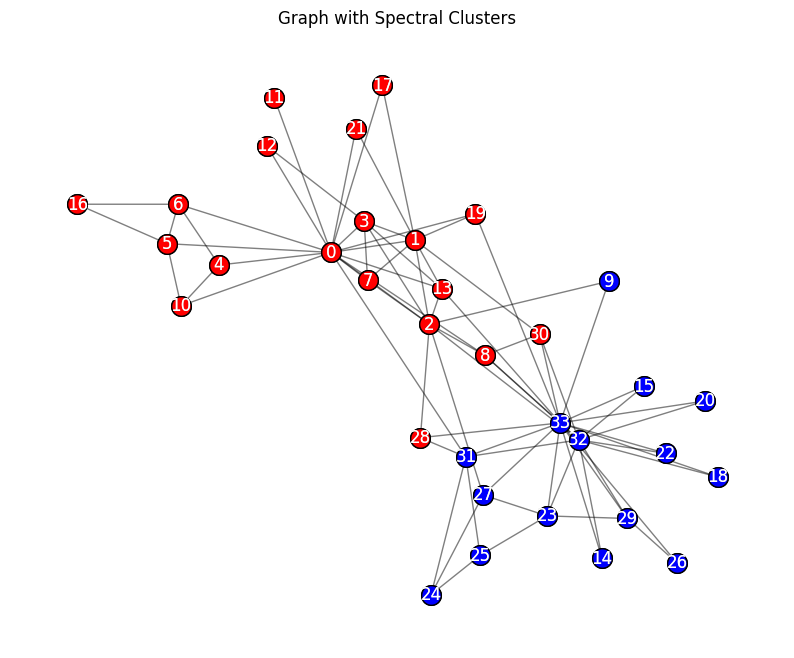

In [78]:
import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms
from cdlib import viz

# Créer un graphe avec NetworkX (par exemple, le graphe du club de karaté)
G = nx.karate_club_graph()

# Utiliser l'algorithme spectral pour détecter les communautés
coms = algorithms.spectral(G, kmax=2)
coms = algorithms.paris(G)

num_clusters = len(coms.communities)
print("Nombre de clusters détectés :", num_clusters)
# Afficher le graphe avec les communautés colorées
plt.figure(figsize=(10, 8))
viz.plot_network_clusters(G, coms, figsize=(10, 8), plot_labels=True)
plt.title("Graph with Spectral Clusters")
plt.show()


Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


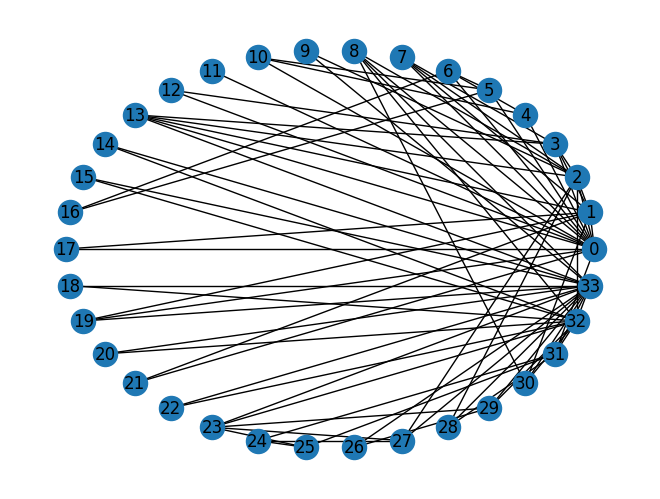

In [72]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

nx.draw_circular(G, with_labels=True)
plt.show()

## Cora Dataset

In [83]:
# Load dataset
adj = np.load('../data/raw/cora/adj.npy')
feat = np.load('../data/raw/cora/feat.npy')
label = np.load('../data/raw/cora/label.npy')
adj.shape, feat.shape, label.shape

((2708, 2708), (2708, 1433), (2708,))

In [84]:
G = nx.from_numpy_array(adj)


In [87]:
import numpy as np


# Utiliser l'algorithme spectral pour détecter les communautés
#coms = algorithms.spectral(G, kmax=10)
coms = algorithms.louvain(G)


num_clusters = len(coms.communities)
print("Nombre de clusters détectés :", num_clusters)



Nombre de clusters détectés : 106


In [38]:
print(coms.size)

<bound method NodeClustering.size of <cdlib.classes.node_clustering.NodeClustering object at 0x2aa502690>>


In [45]:
from sklearn.metrics import accuracy_score



Kmean = skl_cluster.KMeans(n_clusters=7)
Kmean.fit(adj)
clusters = Kmean.predict(adj)

print("Accuracy for K means : ",accuracy_score(label,clusters))
print("Accuracy for Spectral clustering : ",accuracy_score(label,labels))


Davies-Bouldin Score for K means alg.: 2.0019779198541663
Davies-Bouldin Score for Spectral Clustering: 4.440977093852818


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(label,clusters))
print(accuracy_score(label,labels))